In [1]:
%matplotlib nbagg
import numpy as np
import json
import os
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

from alvra_tools.load_data import *
#from alvra_tools.channels_res import *
from alvra_tools.channels import *
from alvra_tools.utils import errfunc_fwhm, errfunc_sigma

In [2]:
#scan_name ="YAG_jet_time_zero_pink_350nm_032"
scan_name ="/"

#DIR = "/sf/alvra/data/p17807/res/scan_data/" + scan_name + "/"
DIR = "/sf/alvra/data/p17589/res/OATT53_tests/"
DIR_json = "/sf/alvra/data/p17807/res/scan_info/"

!ls -lah -t $DIR

total 2.1G
drwxrws---. 16 root  p17589 4.0K Feb 25 16:04 ..
-rw-r--r--.  1 39147 p17589  30M Feb 25 13:57 20200225_motor5_pos-15_12kev.h5
drwxrwsr-x.  2 39147 p17589  32K Feb 25 13:57 .
-rw-r--r--.  1 39147 p17589  30M Feb 25 13:56 20200225_motor5_pos-3_12kev.h5
-rw-r--r--.  1 39147 p17589  30M Feb 25 13:55 20200225_motor4_pos-45_12kev.h5
-rw-r--r--.  1 39147 p17589  30M Feb 25 13:54 20200225_motor4_pos-35_12kev.h5
-rw-r--r--.  1 39147 p17589  30M Feb 25 13:53 20200225_motor4_pos-25_12kev.h5
-rw-r--r--.  1 39147 p17589  30M Feb 25 13:52 20200225_motor4_pos-15_12kev.h5
-rw-r--r--.  1 39147 p17589  30M Feb 25 13:51 20200225_motor4_pos-3_12kev.h5
-rw-r--r--.  1 39147 p17589  30M Feb 25 13:51 20200225_motor3_pos-45_12kev.h5
-rw-r--r--.  1 39147 p17589  30M Feb 25 13:50 20200225_motor3_pos-35_12kev.h5
-rw-r--r--.  1 39147 p17589  30M Feb 25 13:49 20200225_motor3_pos-25_12kev.h5
-rw-r--r--.  1 39147 p17589  30M Feb 25 13:48 20200225_motor3_pos-15_12kev.h5
-rw-r--r--.  1 39147 p17589  30M Feb

PBPS data have 232 shots, avg intensity = 1.5921 +/- 0.1389
GasM data have 250 shots, avg intensity = 171.5871 +/- 15.1336


<IPython.core.display.Javascript object>


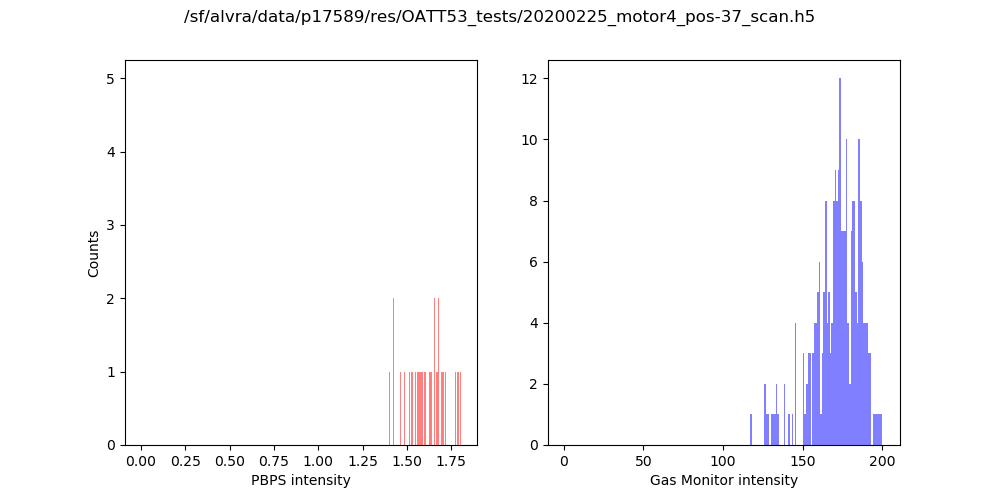

In [81]:
f ="/sf/alvra/data/p17589/res/OATT53_tests/20200225_motor4_pos-37_scan.h5"
fn = f
(Data_PBPS, pids) =load_single_channel(fn, channel_Izero, 48)
(Data_GasM, pids) =load_single_channel(fn, channel_GasMonitor, 48)
conditionGeneral = Data_PBPS > 0.0
Data_PBPS = Data_PBPS[conditionGeneral]
Data_GasM = Data_GasM
Data_GasM_corr = Data_GasM[conditionGeneral]


print ("PBPS data have {} shots, avg intensity = {} +/- {}".format(len(Data_PBPS),round(np.average(Data_PBPS),4), round(np.std(Data_PBPS),4)))
print ("GasM data have {} shots, avg intensity = {} +/- {}".format(len(Data_GasM),round(np.average(Data_GasM),4), round(np.std(Data_GasM),4)))

plt.figure(figsize = (10,5))

plt.suptitle(fn, fontsize=12)
plt.subplot(1,2,1)
plt.hist(Data_PBPS, bins =np.arange(0, np.max(Data_PBPS),0.001), facecolor='red', alpha=0.5)
plt.ylabel ("Counts")
plt.xlabel("PBPS intensity")

plt.subplot(1,2,2)
plt.hist(Data_GasM, bins =np.arange(0,np.max(Data_GasM),1), facecolor='blue', alpha=0.5)

plt.xlabel("Gas Monitor intensity")
plt.show()
#print (IzeroFEL_pump_original.size, IzeroFEL_pump_shot.size)

<IPython.core.display.Javascript object>


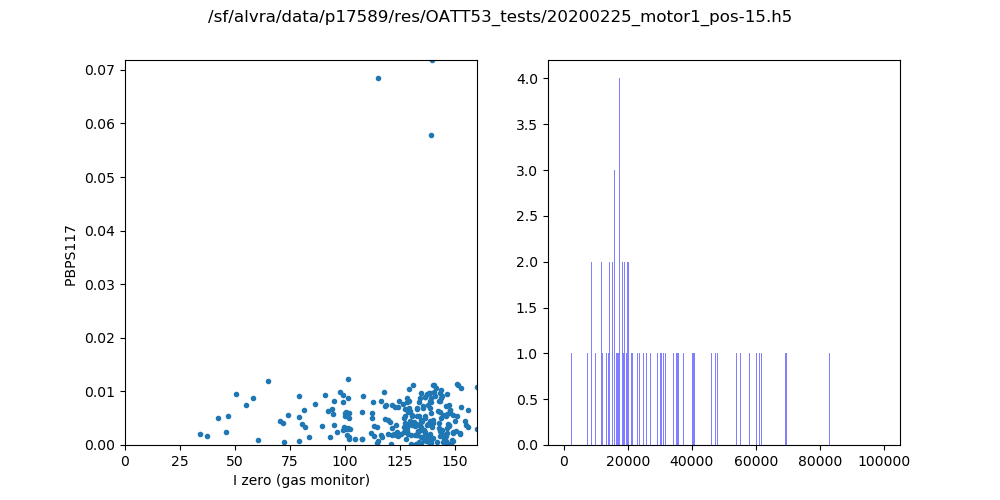

In [9]:
plt.figure(figsize = (10,5))
plt.suptitle(fn, fontsize=12)
plt.subplot(1,2,1)

plt.plot(Data_GasM_corr, Data_PBPS,  linestyle='None', label="correlation",marker='.')
plt.xlabel("I zero (gas monitor)")
plt.ylabel ("PBPS117 ")
plt.ylim((0,np.max(Data_PBPS)))
plt.xlim((0,np.max(Data_GasM_corr)))

plt.subplot(1,2,2)
Data_corr = Data_GasM_corr / Data_PBPS 
plt.hist(Data_corr, bins =np.arange(0,100000,100), facecolor='blue', alpha=0.5)
#plt.hist(Data_corr, facecolor='blue', alpha=0.5)

plt.show()

In [ ]:
!h5ls -d "/sf/alvra/data/p17589/res/OATT53_tests/20200225_motor5_pos-15_12kev.h5/SARFE10-PBPG050:HAMP-INTENSITY-CAL"


In [42]:
fn = DIR  + "test_PBPS122_with_001.h5"

IzeroFEL_pump, IzeroFEL_unpump, Variable, PulseIDs = load_FEL_pp_pulseID(fn, channel_energy, 50, 25, nshots=None)
print (np.abs(IzeroFEL_pump.mean())/np.abs(IzeroFEL_unpump.mean()))

0.8044890292114734


<IPython.core.display.Javascript object>


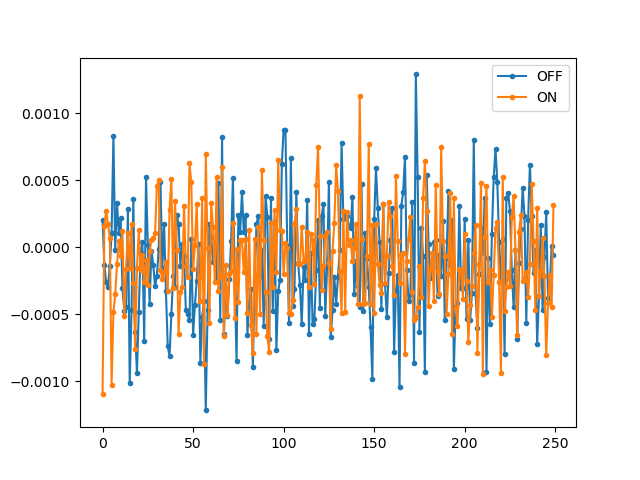

In [43]:
plt.figure()
plt.plot(IzeroFEL_unpump, label = 'OFF', marker='.')
plt.plot(IzeroFEL_pump, label = 'ON', marker='.')
plt.legend(loc="best")
plt.show()
#plt.savefig('Timescan_7_diode')

In [35]:
number_shots = []
for i in range(0,10):
    filename = DIR + scan_name + "_step000%s.BSREAD.h5" % i
    data, pid = load_single_channel(filename, channel_LaserDiode, 18)
    number_shots.append(len(data))
    
